# Class 13: Review practice problems

A few review practice problems. Since we didn't get many questions on Canvas, I am basing this on questions students submitted in previous years.


In [1]:
import YData

# YData.download.download_class_code(13)   # get class code    
# YData.download.download_class_code(13, TRUE) # get the code with the answers 

YData.download.download_data("dow.csv")
YData.download_data("nba_salaries_2015_16.csv")
YData.download_data("daily_bike_totals.csv")
YData.download_data("gapminder_data.csv")

The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `nba_salaries_2015_16.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `daily_bike_totals.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `gapminder_data.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


If you are using colabs, you should run the code below.

In [2]:
# !pip install https://github.com/lederman/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import statistics
import numpy as np
from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Practice problem 1

Using the `nba_salaries` data, create a data frame called `team_count` that displays the following columns:

1. `TEAM`: The team name of each NBA player represented.
2. `num_players`: The number of players on each team.


In [4]:
nba = pd.read_csv("nba_salaries_2015_16.csv")

nba.groupby("TEAM").agg(num_players = ("PLAYER", "count")).reset_index()


,TEAM,num_players
0,Atlanta Hawks,14
1,Boston Celtics,15
2,Brooklyn Nets,13
3,Charlotte Hornets,18
4,Chicago Bulls,12
5,Cleveland Cavaliers,10
6,Dallas Mavericks,11
7,Denver Nuggets,14
8,Detroit Pistons,10
9,Golden State Warriors,14


## Practice problem 2

Suppose the data on the DOW Jones Industrial Average was loading in Python as a DataFrame in the name `dow`. Use Boolean masking to create a DataFrame that extracts data from all "Fridays". Save this to `dow_fridays`. Then, sort this new dataframe by `Open` values.



In [5]:
dow = pd.read_csv("dow.csv")
dow = dow.set_index("Date")


dow_fridays = dow[dow["Day"] == "Friday"]
dow_fridays.sort_values("Open")


,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
1992-01-03,1992,1,Friday,3172.399902,3210.639893,3165.919922,3201.500000,23620000
1992-10-16,1992,10,Friday,3174.699951,3180.350098,3142.530029,3174.399902,40880000
1992-10-09,1992,10,Friday,3176.000000,3176.300049,3131.719971,3136.600098,19310000
1992-10-23,1992,10,Friday,3200.899902,3215.199951,3196.020020,3207.600098,26490000
1992-03-13,1992,3,Friday,3208.600098,3237.030029,3208.179932,3235.899902,16370000
...,...,...,...,...,...,...,...,...
2024-01-05,2024,1,Friday,37455.460938,37623.621094,37323.820312,37466.109375,299480000
2024-01-19,2024,1,Friday,37572.500000,37933.730469,37451.710938,37863.800781,377650000
2023-12-29,2023,12,Friday,37701.628906,37759.429688,37538.800781,37689.539062,234570000


## Practice problem 3

Now visualize the distribution of the opening price of the DOW using seaborn.


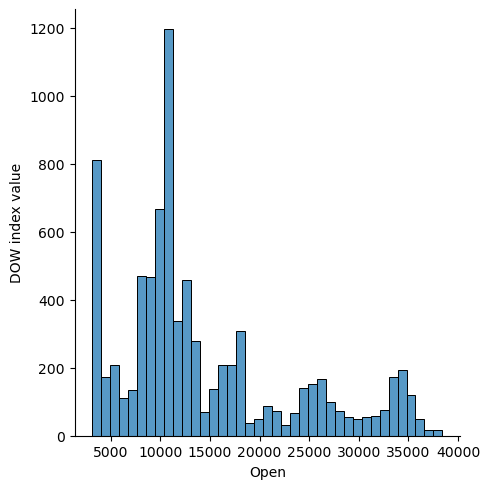

In [6]:
sns.displot(data = dow, x = "Open", kind = "hist");
plt.ylabel("DOW index value");


## Practice problem 4

The code below loads data on the number of bike trips take each date on NYC citibikes, and also weather information. 

Use this data to create a scatter plot that shows the relationship between wind speed for a given date and the number of bike rides taken with both `matplotlib` and `seaborn`. Compare and contrast the two resulting plots and the process of making them. 

Also, calculate the correlation between wind speed and the number of bike trips taken on each date.

In [7]:
import statistics
bikes = pd.read_csv("daily_bike_totals.csv")
bikes.head(3)

,date,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,dow,year,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,2013-07-01,16650,0.838583,0.0,0.0,77.00,71.96,3.13171,1,2013,7,False,NaN,True,True
1,2013-07-02,22745,0.078740,0.0,0.0,82.04,71.96,2.68432,2,2013,7,False,NaN,True,True
2,2013-07-03,21864,0.531496,0.0,0.0,82.94,73.04,4.25018,3,2013,7,False,NaN,True,True


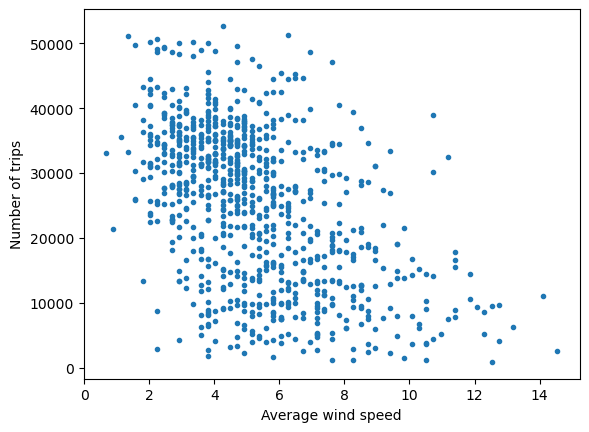

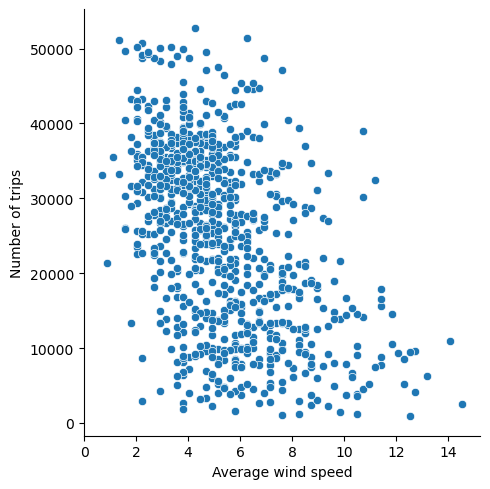

In [8]:
plt.plot(bikes["average_wind_speed"], bikes["trips"], '.');
plt.xlabel("Average wind speed");
plt.ylabel("Number of trips");

g = sns.relplot(data = bikes, x = "average_wind_speed", y = "trips");
g.set_xlabels("Average wind speed");
g.set_ylabels("Number of trips");


In [9]:
statistics.correlation(bikes["average_wind_speed"], bikes["trips"])

nan

In [10]:
### ooopppsss! What went wrong?
bikes = bikes.dropna()
statistics.correlation(bikes["average_wind_speed"], bikes["trips"])

-0.5003417231285866

## Practice problem 5

Now, let's try to look at the relationship between the Dow close and the number of bike trips.

First, we have to merge the two datasets:

In [11]:
dow_bikes = dow.reset_index().merge(bikes, left_on = "Date", right_on = "date")

Then we can calculate the correlation and make a scatterplot.

-0.08833424105049315


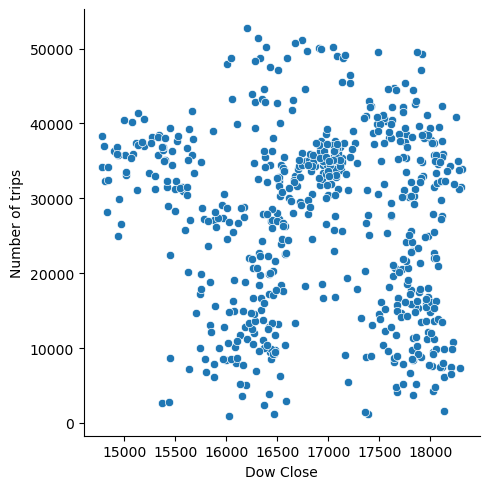

In [12]:
g = sns.relplot(data = dow_bikes, x = "Close", y = "trips");
g.set_xlabels("Dow Close");
g.set_ylabels("Number of trips");

print(statistics.correlation(dow_bikes["Close"], dow_bikes["trips"]))

## Practice problem 6


Consider the following code, in which lines from Taylor Swift's "Love Story" are interspersed in William Shakespeare's Romeo and Juliet:


<pre>

lines =  ["Two households, both alike in dignity,",
          "On a balcony in summer air",
          "In fair Verona, where we lay our scene,",
          "See the lights, see the party, the ball gowns",
          "From ancient grudge break to new mutiny,",
          "See you make your way through the crowd",
          "Where civil blood makes civil hands unclean.",
          "And say, 'Hello'",
          "From forth the fatal loins of these two foes",
          "Little did I know",
          "A pair of star-cross'd lovers take their life;",
          "That you were Romeo, you were throwin' pebbles",
          "Whose misadventured piteous overthrows",
          "And my daddy said, 'Stay away from Juliet'",
          "Do with their death bury their parents' strife.",
          "And I was cryin' on the staircase",
          "The fearful passage of their death-mark'd love,",
          "Beggin' you, 'Please don't go,' and I said",
          "And the continuance of their parents' rage,",
          "'Romeo, take me somewhere we can be alone'",
          "Which, but their children's end, nought could remove,",
          "'I'll be waiting, all there's left to do is run'",
          "Is now the two hours' traffic of our stage;",
          "You'll be the prince and I'll be the princess",
          "The which if you with patient ears attend,",
          "It's a love story, baby, just say, 'Yes'",
          "What here shall miss, our toil shall strive to mend."]
                          
</pre>

If I wanted to print ONLY the text from Romeo and Juliet, I could code the following: `lines[_:_:_]`

Which numbers belong in the blanks above

a) 1, 14, 2

b) 0, 27, 2

c) 1, 27, 4

d) 0, 14, 4



In [13]:

lines =  ["Two households, both alike in dignity,",
          "On a balcony in summer air",
          "In fair Verona, where we lay our scene,",
          "See the lights, see the party, the ball gowns",
          "From ancient grudge break to new mutiny,",
          "See you make your way through the crowd",
          "Where civil blood makes civil hands unclean.",
          "And say, 'Hello'",
          "From forth the fatal loins of these two foes",
          "Little did I know",
          "A pair of star-cross'd lovers take their life;",
          "That you were Romeo, you were throwin' pebbles",
          "Whose misadventured piteous overthrows",
          "And my daddy said, 'Stay away from Juliet'",
          "Do with their death bury their parents' strife.",
          "And I was cryin' on the staircase",
          "The fearful passage of their death-mark'd love,",
          "Beggin' you, 'Please don't go,' and I said",
          "And the continuance of their parents' rage,",
          "'Romeo, take me somewhere we can be alone'",
          "Which, but their children's end, nought could remove,",
          "'I'll be waiting, all there's left to do is run'",
          "Is now the two hours' traffic of our stage;",
          "You'll be the prince and I'll be the princess",
          "The which if you with patient ears attend,",
          "It's a love story, baby, just say, 'Yes'",
          "What here shall miss, our toil shall strive to mend."]

lines[0:27:2]

['Two households, both alike in dignity,',
 'In fair Verona, where we lay our scene,',
 'From ancient grudge break to new mutiny,',
 'Where civil blood makes civil hands unclean.',
 'From forth the fatal loins of these two foes',
 "A pair of star-cross'd lovers take their life;",
 'Whose misadventured piteous overthrows',
 "Do with their death bury their parents' strife.",
 "The fearful passage of their death-mark'd love,",
 "And the continuance of their parents' rage,",
 "Which, but their children's end, nought could remove,",
 "Is now the two hours' traffic of our stage;",
 'The which if you with patient ears attend,',
 'What here shall miss, our toil shall strive to mend.']

## Practice problem 7

Let's say that you have a DataFrame called `USgdp` with the year in a column called `year`, and the United State's GDP per capita in a column called `gdpPercap`. 

Which one of these options would give you the total GDP change between the starting year and each later year? 

a. `np.diff(USgdp["gdpPercap"])`

b. `np.cumsum(USgdp["gdpPercap"])`

c. `np.diff(np.cumsum(USgdp["gdpPercap"]))`

d. `np.cumsum(np.diff(USgdp["gdpPercap"]))`



In [14]:
gapminder = pd.read_csv("gapminder_data.csv")
USgdp = gapminder[gapminder["country"] == "United States"][["year", "gdpPercap"]]
display(USgdp.head(3))

np.cumsum(np.diff(USgdp["gdpPercap"]))

,year,gdpPercap
1608,1952,13990.48208
1609,1957,14847.12712
1610,1962,16173.14586


array([  856.64504,  2182.66378,  5539.88349,  7815.55386, 10082.15005,
       11019.07706, 15893.86833, 18013.45016, 21776.95095, 25106.61747,
       28961.17101])